<a href="https://colab.research.google.com/github/Mand187/Intro-to-ML/blob/master/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HomeWork 1

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Intro-to-ML


In [1212]:
## Code Created by Matthew Anderson for ECGR 4105 Intro-to-ML - HomeWork 1 ##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

In [1213]:
url = "https://raw.githubusercontent.com/Adn02/Intro-to-ML/main/Datasets/D3.csv"
df = pd.read_csv(url)

x1 = df.values[:,0]
x2 = df.values[:,1]
x3 = df.values[:,2]
Y =  df.values[:,3]

m = len(Y)
x0 = np.ones((m,1))
reshaped_x1 = x1.reshape(m,1)
reshaped_x2 = x2.reshape(m,1)
reshaped_x3 = x3.reshape(m,1)

X1 = np.hstack((x0, reshaped_x1))
X2 = np.hstack((x0, reshaped_x2))
X3 = np.hstack((x0, reshaped_x3))

iterations = 1500
alpha = [0.01, 0.05, 0.10]

In [1214]:
def costFunc(X, y, theta):
    m = len(y)  # Number of training examples
    predict = X.dot(theta)
    errors = np.subtract(predict, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent(X, y, alpha, iterations):
    theta = np.zeros(X.shape[1])  # Adjusted to match number of features
    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = costFunc(X, y, theta)

    return theta, cost_history

def computeGradientDescentAlphas(X, y, alphas, iterations, name="Model"):
    thetas = []
    cost_histories = []

    # Perform gradient descent for each learning rate
    for a in alphas:
        final_theta, cost_history = gradient_descent(X, y, a, iterations)
        thetas.append(final_theta)
        cost_histories.append(cost_history)

    # Report the model
    for i, (t, c) in enumerate(zip(thetas, cost_histories)):
        print(f"Model {i+1}: Thetas - {t}") # Print the thetas as an array
        print(f"Cost History {i+1}: {c}")

    print("\n")

    # Print final cost values for each learning rate
    for i, cost_history in enumerate(cost_histories):
        print(f"Final Cost Value for {name} with Alpha = {alphas[i]}:", cost_history[-1])

    print("\n")

    return thetas, cost_histories


In [1215]:
def funcPlot(X, Y, alpha, thetas, cost_histories, iterations, name=""):
    plt.figure(figsize=(9, 4))

    # Plot training data and regression lines
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 1], Y, color='red', marker='+', label='Training Data')

    # Plot regression lines for different alphas
    for i in range(len(alpha)):
        plt.plot(X[:, 1], X.dot(thetas[i]), label=f'Regression for Alpha = {alpha[i]}')

    plt.grid(True)
    plt.legend()
    plt.title(f'Linear Regression for Alpha: {name}')
    plt.xlabel('Input Feature (X)')
    plt.ylabel('Target Variable (Y)')

    # Plot cost histories for different alphas
    plt.subplot(1, 2, 2)
    for i in range(len(alpha)):
        plt.plot(range(1, len(cost_histories[i]) + 1), cost_histories[i], label=f'Alpha = {alpha[i]}')

    plt.grid(True)
    plt.legend()
    plt.title(f'Gradient Descent Cost History for {name}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

    plt.tight_layout()
    plt.show()

In [1216]:
thetas1, cost_histories1 = computeGradientDescentAlphas(X1, Y, alpha, iterations, "X1")
thetas2, cost_histories2 = computeGradientDescentAlphas(X2, Y, alpha, iterations, "X2")
thetas3, cost_histories3 = computeGradientDescentAlphas(X3, Y, alpha, iterations, "X3")

Model 1: Thetas - [ 5.71850653 -1.9568206 ]
Cost History 1: [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]
Model 2: Thetas - [ 5.9279486  -2.03833651]
Cost History 2: [5.32852962 5.18676104 5.07204859 ... 0.98499308 0.98499308 0.98499308]
Model 3: Thetas - [ 5.92794892 -2.03833663]
Cost History 3: [5.16999006 4.96338989 4.7855721  ... 0.98499308 0.98499308 0.98499308]


Final Cost Value for X1 with Alpha = 0.01: 0.9905894438682062
Final Cost Value for X1 with Alpha = 0.05: 0.9849930825406077
Final Cost Value for X1 with Alpha = 0.1: 0.9849930825405946


Model 1: Thetas - [0.71988473 0.56390334]
Cost History 1: [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]
Model 2: Thetas - [0.73606041 0.55760762]
Cost History 2: [4.5369622  4.06234927 3.83409365 ... 3.59936602 3.59936602 3.59936602]
Model 3: Thetas - [0.73606043 0.55760761]
Cost History 3: [3.90731819 3.66528504 3.62832072 ... 3.59936602 3.59936602 3.59936602]


Final Cost Value for X2

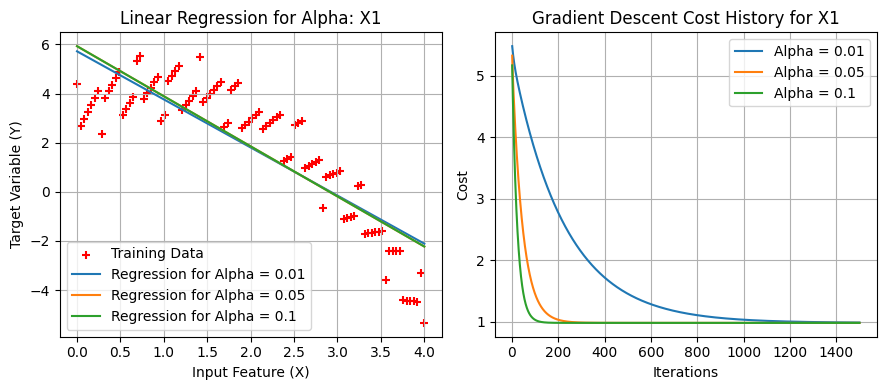

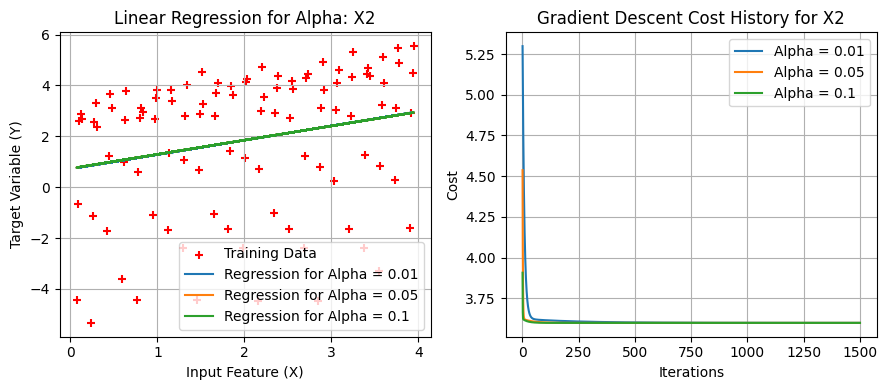

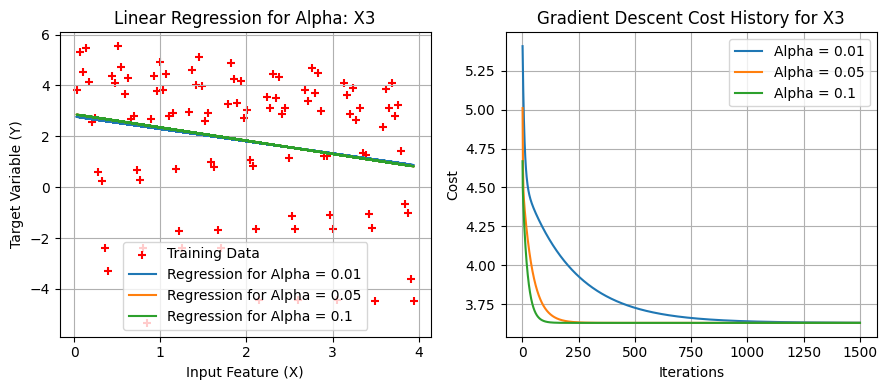

In [1217]:
funcPlot(X1, Y, alpha, thetas1, cost_histories1, iterations, "X1")
funcPlot(X2, Y, alpha, thetas2, cost_histories2, iterations, "X2")
funcPlot(X3, Y, alpha, thetas3, cost_histories3, iterations, "X3")

# PROBLEM 2

In [1218]:
def predict_value(x_in, theta_in):
    y = theta_in[0]
    for x_val, theta_val in zip(x_in, theta_in[1:]):
      y += x_val * theta_val

    return y

Model 1: Thetas - [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
Cost History 1: [5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]
Model 2: Thetas - [ 5.31128136 -2.0033116   0.5330402  -0.26517886]
Cost History 2: [4.35632837 3.99754934 3.73994659 ... 0.73846469 0.73846469 0.73846469]
Model 3: Thetas - [ 5.31416563 -2.00371905  0.53256359 -0.26560164]
Cost History 3: [4.13064348 3.51770697 3.12758306 ... 0.73846424 0.73846424 0.73846424]


Final Cost Value for Combined with Alpha = 0.01: 0.8105104429083866
Final Cost Value for Combined with Alpha = 0.05: 0.7384646851794184
Final Cost Value for Combined with Alpha = 0.1: 0.7384642415684215




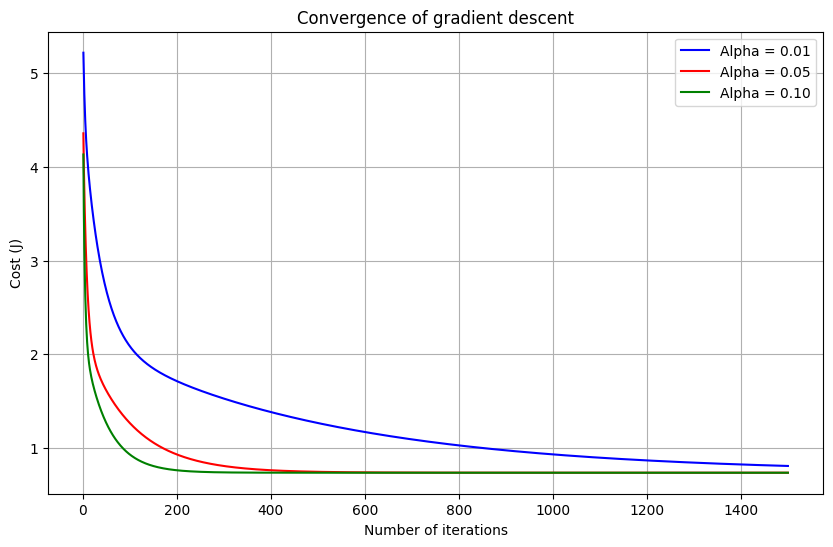

[ 5.31416563 -2.00371905  0.53256359 -0.26560164]
Prediction:  3.577408529345462
Prediction:  0.2443209702176523
Prediction:  0.1025340197359193


In [1223]:
total_data = np.hstack((x0, reshaped_x1, reshaped_x2, reshaped_x3))

combinedTheta, combinedCostHistory = computeGradientDescentAlphas(total_data, Y, alpha, iterations, "Combined")

plt.plot(range(1, iterations + 1), combinedCostHistory[0], color='blue', label = 'Alpha = 0.01')
plt.plot(range(1, iterations + 1), combinedCostHistory[1], color='red', label = 'Alpha = 0.05')
plt.plot(range(1, iterations + 1), combinedCostHistory[2], color='green', label = 'Alpha = 0.10')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.legend()
plt.title('Convergence of gradient descent')
plt.show()


def predict_value(x_in, theta_in):
    y = theta_in[0]
    for x_val, theta_val in zip(x_in, theta_in[1:]):
      y += x_val * theta_val

    return y

# Initialize the values
values_1 = [1,1,1]
values_2 = [2,0,4]
values_3 = [3,2,1]

# Predict the values
y1 = predict_value(values_1, combinedTheta[2])
y2 = predict_value(values_2, combinedTheta[2])
y3 = predict_value(values_3, combinedTheta[2])

print(combinedTheta[2])

print("Prediction: ", y1)
print("Prediction: ", y2)
print("Prediction: ", y3)
